<a href="https://colab.research.google.com/github/vjbarayuga/Week7-Classification_Models/blob/main/ConfusionMatrixExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from numpy import nan
from numpy import isnan

#pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer

#for missing value and feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [190]:
# open filename
filename = '/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/04_Classification_Models/DATASET/cancer.csv'
data = pd.read_csv(filename)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [191]:
data.shape
#print("Cancer data set dimensions : {}".format(data.shape))

(569, 32)

In [192]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [193]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [194]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [196]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [197]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type
numerical_features = num_selector(data)
categorial_features = cat_selector(data)
#check our lists
print('numeric columns are', numerical_features)
print('categorical columns are', categorial_features)

numeric columns are ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
categorical columns are ['diagnosis']


In [198]:
X = data[['radius_mean', 'concave points_mean']]
y = data['diagnosis']
y = y.map({'M':1, 'B':0})

In [199]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type
numerical_features = num_selector(data)
categorial_features = cat_selector(data)
#check our lists
print('numeric columns are', numerical_features)
print('categorical columns are', categorial_features)

numeric columns are ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
categorical columns are ['diagnosis']


In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [201]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [219]:
print(X_train)

[[ 1.04498520e+00  9.81746826e-01]
 [ 1.68141074e+00  1.38968590e+00]
 [-1.44260855e+00 -1.17143992e+00]
 [-5.54379860e-01 -6.15972197e-01]
 [-5.18407982e-01 -7.37896701e-01]
 [ 1.78893047e-01 -5.28846978e-01]
 [-1.86359873e-01 -4.52131120e-02]
 [ 1.57072804e+00  1.13593052e+00]
 [ 1.75335450e+00  2.09837208e+00]
 [-6.15255347e-01 -1.73995869e-01]
 [-3.68986333e-01 -6.64487989e-01]
 [ 2.48939447e+00  1.88246410e+00]
 [ 1.81660115e-01  1.00689375e+00]
 [ 7.26772427e-01 -5.55771973e-01]
 [ 1.48771601e+00  2.00692870e+00]
 [ 1.65097300e+00  2.81467854e+00]
 [-5.37777455e-01 -5.85745080e-01]
 [ 4.19627926e-01  3.18020306e-01]
 [-5.29476252e-01 -1.04283497e+00]
 [ 1.34382850e+00  1.27055549e+00]
 [-8.67058496e-01 -6.03525737e-01]
 [ 4.25162062e-01  3.81776662e-01]
 [ 9.20467158e-01  6.42390289e-01]
 [ 4.14093791e-01  2.47405698e-01]
 [-8.28319550e-01 -1.09620234e+00]
 [ 2.14864926e-01 -2.75091604e-01]
 [ 2.31467331e-01 -1.58501297e-01]
 [ 1.43514173e+00  9.97495408e-01]
 [-6.42926023e-01 -7

In [229]:
print(X_test)

[[ 0.1318529   0.34062714]
 [-0.28874137  0.6047969 ]
 [-0.34961686 -0.40362035]
 [ 1.13353136  0.21717858]
 [ 0.25360387 -0.56390027]
 [ 0.53861183  0.1661227 ]
 [ 1.37703331  1.19587674]
 [ 1.06988881  0.20803424]
 [-1.03308255 -0.47982317]
 [ 0.08757982  0.39015897]
 [-0.87812677 -0.6296887 ]
 [-0.00650048  0.38177666]
 [ 0.56074837  1.03966097]
 [-0.51287385 -0.77167995]
 [ 0.14568824 -0.49074557]
 [-0.36898633  0.08737979]
 [-0.55714693 -0.8298481 ]
 [-0.70103444 -0.46407459]
 [-1.00817894  0.24943777]
 [ 1.73398502  0.27001253]
 [-0.40219114 -0.80724126]
 [-0.73147219 -0.89690658]
 [ 1.48771601  1.04245507]
 [-0.40495821 -0.49887387]
 [ 0.15675651  1.03381875]
 [-0.80618301 -0.53468919]
 [ 0.10418222 -0.31065292]
 [ 1.17503737  0.97438055]
 [ 3.59898857  3.51066425]
 [ 0.77381258  0.1094786 ]
 [ 2.03282832  2.26855836]
 [-0.87259263 -0.41098662]
 [ 0.53031063  1.35158449]
 [-0.0646089   0.38203067]
 [-1.31393991 -0.87760186]
 [-0.02863702 -0.56542433]
 [ 1.02838279 -0.05461146]
 

In [286]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [264]:
from sklearn.tree import DecisionTreeClassifier

In [265]:
classifier_DT = DecisionTreeClassifier(max_depth=6, random_state=1)

In [266]:
# Fit dt to the training set
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [267]:
# Predict test set labels
#y_pred = classifier_DT.predict(X_test)
classifier_DT = classifier_DT.score(X_train, y_train)
#print(y_pred[0:5])
classifier_DT

0.9582417582417583

In [268]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [269]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [270]:
# Predict test set labels
#y_pred = classifier_rf.predict(X_test)
classifier_rf = classifier_rf.score(X_train, y_train)
#print(y_pred[0:5])
classifier_rf

0.9978021978021978

In [287]:
from sklearn.ensemble import BaggingClassifier

In [272]:
classifier_bg=BaggingClassifier(base_estimator= None, oob_score=True, random_state=1)

In [273]:
classifier_bg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(oob_score=True, random_state=1)

In [274]:
# Predict test set labels
#y_pred = classifier_bg.predict(X_test)
classifier_bg = classifier_bg.score(X_train, y_train)
#print(y_pred[0:5])
classifier_bg

0.9934065934065934

In [275]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
classifier_DT = DecisionTreeClassifier(max_depth=6, random_state=1)

In [277]:
# Fit dt to the training set
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [278]:
# Predict test set labels
y_pred = classifier_DT.predict(X_test)

In [279]:
from sklearn.metrics import confusion_matrix

#cm = np.array(confusion_matrix(y_test, y_pred, labels = [1, 0]))
#confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
#                         columns=['predicted_cancer', 'predicted_healthy'])
#confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  2],
       [11, 31]])

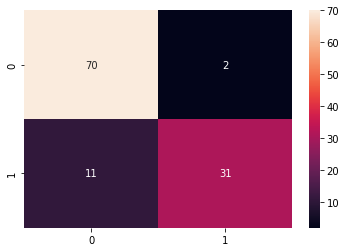

In [280]:
sns.heatmap(cm, annot=True)

In [281]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [282]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [283]:
# Predict test set labels
y_pred = classifier_rf.predict(X_test)


In [284]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[68,  4],
       [ 8, 34]])

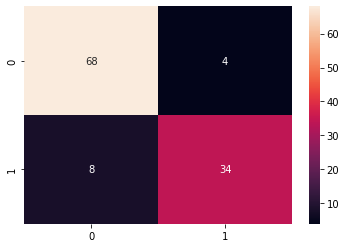

In [285]:
sns.heatmap(cm, annot=True)

In [288]:
from sklearn.ensemble import BaggingClassifier

In [289]:
classifier_bg=BaggingClassifier(base_estimator= None, oob_score=True, random_state=1)

In [290]:
classifier_bg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(oob_score=True, random_state=1)

In [294]:
# Predict test set labels
y_pred = classifier_bg.predict(X_test)
#classifier_bg = classifier_bg.score(X_train, y_train)
#print(y_pred[0:5])
#classifier_bg

In [295]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[69,  3],
       [ 7, 35]])

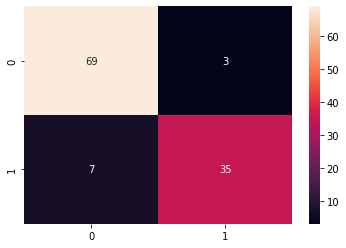

In [296]:
sns.heatmap(cm, annot=True)